In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'AppleGothic'  # 사용할 한글 폰트 설정

#### 복습
1. csv 폴더 안에 있는 drinks.csv 파일 로드
2. 데이터프레임의 정보, 결측치가 존재하는가?
3. 컬럼의 이름을 변경 -> ['국가', '맥주소비량','증류주소비량', '와인소비량','소비알콜량', '대륙']
4. 대륙 컬럼에 결측치가 존재  -> 결측치를 'OT'로 대체
5. 새로운 파생변수(총 술 소비량) 생성 -> 맥주 소비량 + 증류주소비량 + 와인소비량
6. 새로운 파생변수(도수) 생성 -> 소비알콜량 / 총술소비량 * 100
7. 도수 컬럼의 전체 평균보다 대륙별 도수 평균이 높은 대륙들을 출력


In [258]:
# 1. csv 폴더 안에 있는 drinks.csv 파일 로드
df = pd.read_csv('../csv/drinks.csv')

In [259]:
# 2. 데이터프레임의 정보, 결측치가 존재하는가?
df.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64

In [260]:
# 컬럼의 이름을 변경 -> ['국가', '맥주소비량','증류주소비량', '와인소비량','소비알콜량', '대륙']
#case1
#df.columns = ['국가', '맥주소비량','증류주소비량', '와인소비량','소비알콜량', '대륙']

#case2
df = df.rename(
    columns = {
        'country': '국가',
        'beer_servings' : '맥주소비량',
        'spirit_servings' : '증류주소비량',
        'wine_servings' : '와인소비량',
        'total_litres_of_pure_alcohol' : '소비알콜량',
        'continent' : '대륙'
    }
)




In [261]:
df

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [262]:
# 4. 대륙 컬럼에 결측치가 존재  -> 결측치를 'OT'로 대체
df['대륙'] = df['대륙'].fillna('OT')

In [263]:
# 5. 새로운 파생변수(총 술 소비량) 생성 -> 맥주 소비량 + 증류주소비량 + 와인소비량
df['총 술 소비량'] = df['맥주소비량'] + df['증류주소비량'] + df['와인소비량']

In [264]:
# 6. 새로운 파생변수(도수) 생성 -> 소비알콜량 / 총술소비량 * 100
df['도수'] = df['소비알콜량'] / df['총 술 소비량'] *100


In [265]:
#6.5 도수 컬럼의 결측치를 0으로 대체
df['도수'].fillna(0, inplace = True)

In [266]:
# 7. 도수 컬럼의 전체 평균보다 대륙별 도수 평균이 높은 대륙들을 출력
all_mean = df['도수'].mean() # 전체 도수의 평균
df1 = df.groupby('대륙')['도수'].mean().reset_index()
#df1 = df[['대륙', '도수']].groupby(['대륙']).mean()
#print(df1)
print(f"전체 도수의 평균 : {all_mean}")
print('#######도수 컬럼의 전체 평균보다 대륙별 도수 평균이 높은 대륙#######')
print(df1.loc[df1['도수']> all_mean])



전체 도수의 평균 : 2.611480600310524
#######도수 컬럼의 전체 평균보다 대륙별 도수 평균이 높은 대륙#######
   대륙        도수
0  AF  4.974072


In [267]:
df[['대륙', '도수']].groupby(['대륙']).mean()

,도수
대륙,
AF,4.974072
AS,1.635903
EU,1.752705
OC,1.689543
OT,1.785407
SA,1.786790


- 총 술소비량을 기준으로 우리나라는 몇위인가?
    1. 총 술소비량을 기준으로 내림차순 정렬
    2. 인덱스를 초기화하고 기존의 인덱스는 제거
    3. 국가 컬럼의 데이터가 South Korea인 데이터의 인덱스와 총술소비량 데이터를 확인
    4. 전체 데이터를 기준으로 막대그래프를 생성하고 한국의 막대의 색상을 변경하고 주석을 추가

In [268]:
df2

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총 술 소비량,도수
0,Andorra,245,138,312,12.4,EU,695,1.784173
1,Grenada,199,438,28,11.9,OT,665,1.789474
2,Czech Republic,361,170,134,11.8,EU,665,1.774436
3,France,127,151,370,11.8,EU,648,1.820988
4,Russian Federation,247,326,73,11.5,AS,646,1.780186
...,...,...,...,...,...,...,...,...
188,Kuwait,0,0,0,0.0,AS,0,0.000000
189,San Marino,0,0,0,0.0,EU,0,0.000000
190,Iran,0,0,0,0.0,AS,0,0.000000
191,Somalia,0,0,0,0.0,AF,0,0.000000


In [269]:
# 총 술소비량을 기준으로 내림차순 정렬
df2 = df.copy()

In [270]:
df2.sort_values(['총 술 소비량'], ascending=False, inplace = True)

In [271]:
# 인덱스를 재지정하고 기존의 인덱스는 제거
df2.reset_index(drop = True, inplace = True)

In [272]:
# South Korea의 데이터를 확인
flag = df2['국가']=='South Korea'
df2.loc[flag]


,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총 술 소비량,도수
98,South Korea,140,16,9,9.8,AS,165,5.939394


In [273]:
# South Korea의 인덱스와 총 술 소비량의 데이터를 변수에 저장
korea_index = df2.loc[flag].index[0]
korea_index

98

In [274]:
korea_value = df2.loc[korea_index, '총 술 소비량']
korea_value

165

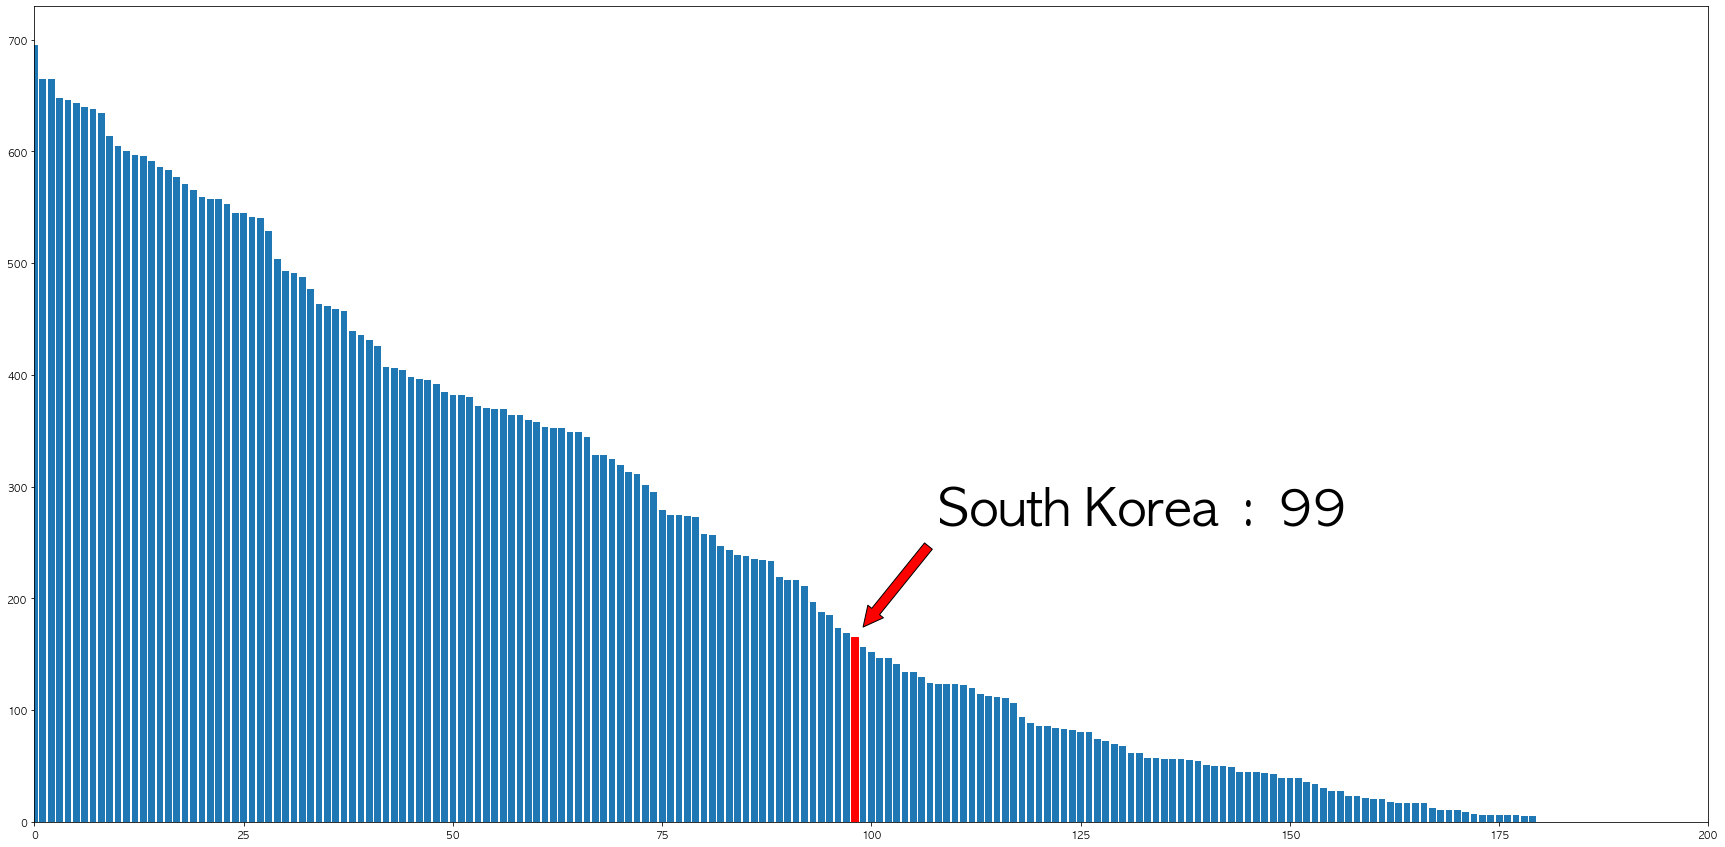

In [275]:
# korea_index는 x축 좌표 값
# korea_value는 y축 좌표 값

# 총 술소비량 데이터를 기준으로 막대 그래프를 생성
x = df2.index
y = df2['총 술 소비량']

# 그래프의 크기를 변경
plt.figure(figsize=(30,15))

# 막대그래프 생성
bar_list = plt.bar(x, y)
# South Korea의 막대를 선택하여 막대의 색상을 변경
bar_list[korea_index].set_color('r')

# 주석을 추가
plt.annotate(
    fontsize = 50,
    text = f'South Korea : {korea_index + 1}',
    xy = (korea_index, korea_value),
    xytext = (korea_index + 10, korea_value + 100),
    arrowprops = {
        'facecolor':'r',
        'edgecolor' : 'k',
        'headwidth' : 20,
        'headlength' : 20,
        'width' : 10,
        'shrink' : 0.1 ## 막대와 화살표간의 거리
    }
)
plt.xlim(0,200)

plt.show()

#### 복습
- 도수를 기준으로 우리나라가 얼마나 독한 술을 먹고 있는가?
    1. df2 복사본 생성 (df3)
    2. df3 도수를 기준으로 내림차순 정렬
    3. 기존의 인덱스는 제거하고 인덱스를 재지정
    4. South Korea의 인덱스의 값과 도수의 value를 변수로 저장
    5. 막대그래프 생성하여 x축은 인덱스 값, y축은 도수
    6. 한국의 막대의 색상을 red로 변경
    7. 주석을 생성하여 South Korea : 랭킹, 도수 : value 추가


In [276]:
# 1. df2 복사본 생성 (df3)
df3 = df.copy()

In [277]:
# 2. df3 도수를 기준으로 내림차순 정렬
# 3. 기존의 인덱스는 제거하고 인덱스를 재지정
df3.sort_values(['도수'], ascending=False, inplace = True)


In [278]:
df3.reset_index(drop = True, inplace = True)

In [279]:
# 4. South Korea의 인덱스의 값과 도수의 value를 변수로 저장
kor_index = df3.loc[df3['국가']=='South Korea'].index[0]
kor_value = df3.loc[kor_index,'도수']

In [280]:
print(kor_index)
print(kor_value)

14
5.93939393939394


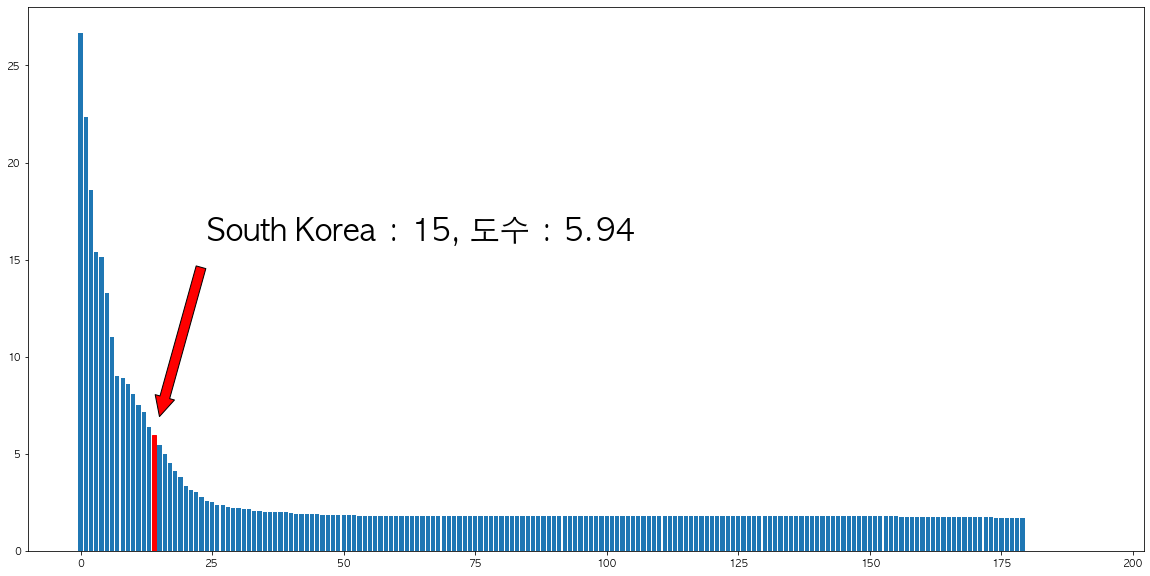

In [285]:
# 5. 막대그래프 생성하여 x축은 인덱스 값, y축은 도수
plt.figure(figsize = (20,10))
x = df3.index
y = df3['도수']
bar_list = plt.bar(x,y)

# 6. 한국의 막대의 색상을 red로 변경
bar_list[kor_index].set_color('r')


# 7. 주석을 생성하여 South Korea : 랭킹, 도수 : value 추가
plt.annotate(
    fontsize = 30,
    text = f'South Korea : {kor_index +1}, 도수 : {round(kor_value,2)}',
    xy = (kor_index, kor_value),
    xytext = (kor_index + 10, kor_value + 10),
    arrowprops = {
        'facecolor':'r',
        'edgecolor' : 'k',
        'headwidth' : 20,
        'headlength' : 20,
        'width' : 10,
        'shrink' : 0.1 ## 막대와 화살표간의 거리
    }
)
plt.show()

In [282]:
df

,국가,맥주소비량,증류주소비량,와인소비량,소비알콜량,대륙,총 술 소비량,도수
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,1.781818
2,Algeria,25,0,14,0.7,AF,39,1.794872
3,Andorra,245,138,312,12.4,EU,695,1.784173
4,Angola,217,57,45,5.9,AF,319,1.849530
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,1.766055
189,Vietnam,111,2,1,2.0,AS,114,1.754386
190,Yemen,6,0,0,0.1,AS,6,1.666667
191,Zambia,32,19,4,2.5,AF,55,4.545455
